# Exploring the Airbnb London Listings dataset 
This jupyter notebook will start by exploring some simple questions about the types of listings in london.

Firstly, importing pandas, numpy, and the dataset.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
airbnb = pd.read_csv('data/listings.csv', low_memory=False, header=0)
#list(airbnb.columns) 

Airbnb hosts can list entire homes/apartments, private or shared rooms.

Private rooms are more like hotels, and a shared room more like a hostel. This could be disruptive to neighbourhoods, as Airbnb has said: 'Depending on the room type, availability, and activity, an airbnb listing could be more like a hotel, disruptive for neighbours, taking away housing, and illegal.'

In [132]:
airbnb_room_type = airbnb.groupby(['room_type']).count()['id']
print(airbnb_room_type)

room_type
Entire home/apt    45065
Private room       34964
Shared room          738
Name: id, dtype: int64


We therefore get, a count of 45065 for entire home or appartment, 34964 for Private Room, and 738 for share rooms. 

But it would be useful to know the proportion of these that are of each category. 

In [133]:
percent_room_type = airbnb_room_type/(airbnb['room_type'].count())
print(percent_room_type)

room_type
Entire home/apt    0.557963
Private room       0.432900
Shared room        0.009137
Name: id, dtype: float64


We therefore see that the largest proportion of listings, 56% are for entire home of apartments, followed by 43% of the listings that are for private rooms, and finally 1% of the listings that are for shared rooms. 

Other important information, include the fact that Airbnb, has stated that: 'Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents.' It would be interesting to observe, how many of the listings are available all year round, and what room type these often are. Airbnb define the following goupings based on the level of availability the listing has: 

- Low availability 0-60 days a year
- Medium availability 60-90 days a year
- High availability 90-365 days a year

This next section will work out the percentage of the listings that fall into each of these categories. 

In [229]:
# calculate what percentage/count of listings are 
# highly avialable > 90 days. 
listings = airbnb['id'].count()
availability = airbnb['availability_365']
availability_count = availability.count()

print("Total Number of Listings: " + str(listings))

def get_availability(x):
    return airbnb[x]['id']

availability_low = get_availability(availability <= 60)
availability_medium = get_availability((availability <= 90) & (availability > 60))
availability_high = get_availability(availability > 90)

print("Low Availability Count:", str(availability_low.count()))
print("Medium Availability Count:", str(availability_medium.count()))
print("High Availability Count:", str(availability_high.count()))

def calculate_percent(x):
    x = x/listings
    return x

print("Low Availability Percent:", str(calculate_percent(availability_low).count()))
print("Medium Availability Percent:", str(calculate_percent(availability_medium).count()))
print("High Availability Percent:", str(calculate_percent(availability_high).count()))
     

Total Number of Listings: 80767
Low Availability Count: 40557
Medium Availability Count: 6958
High Availability Count: 33252
Low Availability Percent: 40557
Medium Availability Percent: 6958
High Availability Percent: 33252


Scatter plot, to see if there is any clustering, as in is one type of room more likely to be at one end of the graph (e.g. is shared room less availabile, than a private room etc.)

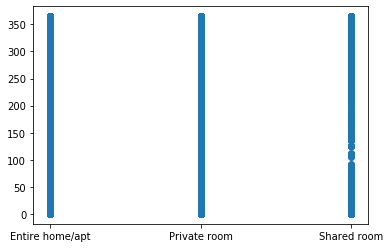

In [230]:
plt.scatter(airbnb['room_type'], availability)

We don't see much in the scatter plot. Maybe some grouping in 'Shared room', but all the others appear to have continuous availabiity. 

We can check this statistically, and see what percentage of each room type, entire/private/shared that fall into each of the availability categories. If high avialability on differnet room types may cause different amounts of disturbance for the local neighbourhoods. High vailability on entire listing could lead to a lack of housing avialability, and high avialability of private rooms may lead to a business in a hotel style enviroment. 

In [263]:
#calculate the percentage of each room type that has each type of availability


def print_percent_availability(roomtype, availability, availability_label):
    all_listings = airbnb[airbnb.room_type == roomtype]
    filtered_listings = all_listings[all_listings['id'].isin(availability)]['id']
    percentage = (filtered_listings.count()/all_listings.count())['id']
    print(roomtype + ' - ' + availability_label + ': ' + str(percentage))
    
print('Percentage of room type for each availability.')

print_percent_availability('Entire home/apt', availability_low, 'low')
print_percent_availability('Entire home/apt', availability_medium, 'medium')
print_percent_availability('Entire home/apt', availability_high, 'high')
print_percent_availability('Private room', availability_low, 'low')
print_percent_availability('Private room', availability_medium, 'medium')
print_percent_availability('Private room', availability_high, 'high')
print_percent_availability('Shared room', availability_low, 'low')
print_percent_availability('Shared room', availability_medium, 'medium')
print_percent_availability('Shared room', availability_high, 'high')


Percentage of room type for each availability.
Entire home/apt - low: 0.5218018417840896
Entire home/apt - medium: 0.06858981471208254
Entire home/apt - high: 0.4096083435038278
Private room - low: 0.47943599130534265
Private room - medium: 0.108254204324448
Private room - high: 0.41230980437020937
Shared room - low: 0.3780487804878049
Shared room - medium: 0.1111111111111111
Shared room - high: 0.510840108401084
